In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

import os
import sys
import time

from tensorflow import keras
from tensorflow.keras.models import Sequential
from numpy import array

for module in [matplotlib, np, sklearn, pd, tf]:
    print(module.__name__, module.__version__)

matplotlib 3.2.0
numpy 1.18.1
sklearn 0.22.2.post1
pandas 0.24.1
tensorflow 2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# 数据集中共有6w个样本 用前5000个样本作为验证集, 后5.5w个样本作为训练集
x_valid, x_train = x_train_all[: 5000], x_train_all[5000: ]
y_valid, y_train = y_train_all[: 5000], y_train_all[5000: ]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape([-1, 1])).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape([-1, 1])).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape([-1, 1])).reshape(-1, 28, 28)

In [4]:
model: Sequential = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#or
# model: Sequential = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布 x = [x1, x2, x3]
#       y = [[e^x1/sum, e^x2/sum, e^x3/sum], sum=e^x1+e^x2+e^x3]

# reason for sparse: y->index, y->onehot->[]
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)



In [5]:
model.summary()
# [None, 784] * W + b -> [None, 300]  W.shape [784, 300], b=[300]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 261us/sample - loss: 0.4572 - accuracy: 0.8331 - val_loss: 0.3751 - val_accuracy: 0.8594
Epoch 2/10
55000/55000 [==============================] - 90s 2ms/sample - loss: 0.3504 - accuracy: 0.8703 - val_loss: 0.3493 - val_accuracy: 0.8756
Epoch 3/10
55000/55000 [==============================] - 17s 313us/sample - loss: 0.3178 - accuracy: 0.8822 - val_loss: 0.3378 - val_accuracy: 0.8824
Epoch 4/10
55000/55000 [==============================] - 13s 241us/sample - loss: 0.2916 - accuracy: 0.8914 - val_loss: 0.3306 - val_accuracy: 0.8800
Epoch 5/10
55000/55000 [==============================] - 13s 231us/sample - loss: 0.2724 - accuracy: 0.8981 - val_loss: 0.3301 - val_accuracy: 0.8818
Epoch 6/10
55000/55000 [==============================] - 27s 493us/sample - loss: 0.2581 - accuracy: 0.9037 - val_loss: 0.3577 - val_accuracy: 0.8690
Epoch 7/10
55000/55000 [=======================

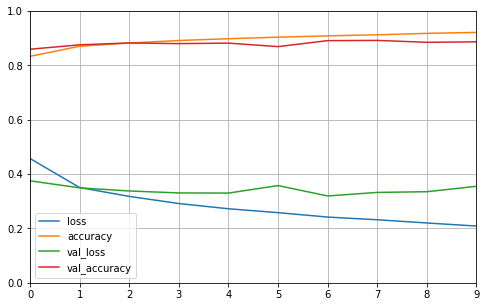

In [7]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curve(history)

In [11]:
result = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
??model.evaluate